# Monty hall problem explained on Jupyter Notebook

## Introduction :   
The monty hall problem is kind of famous, it could be vue such as a game on a TV show.  
The candidate of this TV show would come an find in front of him 3 gates, there is a gain only behind one gate, behind the others their is whatever you want to imagine for the show but no gain.  
At the first turn the candidate have to chose a gate (of course the one he thinks to be the treasure one).  
Then the presentator open one of the gate behind which there is no gain (so stay one with the gain and one without).  
For the second turn the candidate can chose to change his choice or not.  
In this simulation we will be what is the best strategy to chose.

## Simulation with "basic" python library

Import of the needed libraries :

In [1]:
%matplotlib inline
from random import randint, seed
from enum import Enum
import matplotlib.pyplot as plt

creation of an enum class for the candidate strategy :

In [2]:
class Strategy(Enum):
    CHANGE = 1
    KEEP = 2

function which define the game:

In [3]:
seed()
def playGame(strategy):
    gates=[0,1,2]
    goodGate=randint(0,2)
    firstChoice=randint(0,2)
    gates.remove(firstChoice)
    if firstChoice == goodGate:
        gates.remove(gates[randint(0,1)])
    else:
        gates=[goodGate]
    secondChoice = 0
    if strategy == Strategy.CHANGE:
        secondChoice=gates[0]
    elif strategy == Strategy.KEEP:
        secondChoice=firstChoice
    else:
        raise ValueError("non reconize strategy")
    return secondChoice==goodGate

function to lauch several play (for statistic purpose we need several play)

In [4]:
def play(strategy, turn):
    return [1 if playGame(strategy) else 0 for i in range(turn)]

Run the simulation and visualize result on histogram (don't hesitate to change the turn number as you wish)

with change strategy, win : 642 on 1000
with keep strategy, win : 331 on 1000


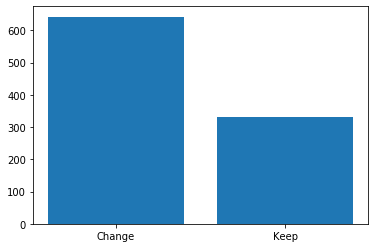

In [5]:
turn=1000
winWithChange=sum(play(Strategy.CHANGE, turn))
winWithKeep=sum(play(Strategy.KEEP, turn))
print("with change strategy, win : {} on {}".format(winWithChange,turn))
print("with keep strategy, win : {} on {}".format(winWithKeep,turn))
plot = plt.bar([1,2],[winWithChange, 
               winWithKeep], 
        tick_label=["Change","Keep"])

### what do we learn from this simulation and how to interpret it ?
More the number of turn is important more we see that changing door at the second turn is a better strategy.  
how to explain it ?  
We can also see that for the change strategy the value tend to around 66% which can be express as 2/3 and then the keep strategy tend to 33% which can be express 1/3.  
But at the second turn there is only 2 door so what for this result ?  
At the first turn our candidate as only 1/3 probability to directly chose the good gate, when one gate is open this probability doesn't change however for the other gate the probability become 2/3.

## Use of Numpy library

Same problem with numpy library

Importing the libraries 

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Simulating the problem :

In [7]:
turn = 1000
goodGate = np.random.randint(0,3, size=(turn)) # 3 for numpy and not 2 
firstChoice = np.random.randint(0,3, size=(turn))
winWithChange = (goodGate!=firstChoice).astype(int)
winWithKeep = (goodGate==firstChoice).astype(int)


visualize the result on an histogram :

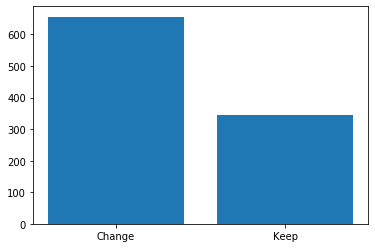

In [8]:
plot = plt.bar([1,2],[winWithChange.sum(), winWithKeep.sum()],tick_label=["Change","Keep"])